# Case Analytics - Ricardo Rolo de Almeida

---

## 1. Conhecendo a base de dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./df_criado_final.csv')
df.head()

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,...,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado
0,NaN,NaN,S,2,36,S,N,NaN,NaN,N,...,8174.32,263.25,5844.98,14282.55,1,1,1328587.0,1,2020-01-01,57
1,1.0,1894.5078,N,2,39,S,N,2.0,1.0,S,...,41775.63,1607.29,7652.26,51035.18,1,1,1424254.0,1,2020-01-01,59
2,1.0,NaN,S,2,26,S,N,NaN,1.0,S,...,522940.27,24860.40,319315.62,867116.29,1,1,1438519.0,0,2020-01-01,56
3,NaN,NaN,N,8,23,N,N,NaN,NaN,N,...,1593.00,21472.36,2967.48,26032.84,1,1,1426138.0,1,2020-01-01,56
4,NaN,NaN,S,2,33,S,N,NaN,NaN,N,...,2078.97,19.44,46.35,2144.76,1,1,1474504.0,0,2020-01-01,59


### 1.1 Tipos de Dados

In [3]:
df.shape

(50390, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50390 entries, 0 to 50389
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Escolaridade                 14615 non-null  float64
 1   Renda Mensal Informal        9768 non-null   float64
 2   Dependentes                  50390 non-null  object 
 3   Estado Civil                 50390 non-null  int64  
 4   Idade                        50390 non-null  int64  
 5   Conta Poupanca               50390 non-null  object 
 6   Conta Salario                50390 non-null  object 
 7   Quant Adiantamento Deposito  21843 non-null  float64
 8   Qtd Fonte Renda              12806 non-null  float64
 9   Cheque Sem Fundo             50390 non-null  object 
 10  Conta Conjunta               50390 non-null  object 
 11  Valor Conta Corrente         0 non-null      float64
 12  Valor Conta Poupanca         0 non-null      float64
 13  Valor Emprestimo

> Como pudemos ver, nosso dataset possui: 50390 **linhas** e 23 **colunas** de dados, sendo eles, majoritariamente, valores **numéricos**, contendo também valores **booleanos** (Conta Poupanca, Conta Salario, Cheque Sem Fundo, etc) e **numéricos categóricos** (Escolaridade, Estado Civil, Gênero e Estado).  

> **Comentário:** o campo 'ID' (Identificação do tomador de crédito) é do tipo float, isso pode ser rapidamente corrigido, porém, normalmente, campos de identificação são armazenados como números inteiros

### 1.2 Características dos Dados  

Para análise de aprovação de crédito, usa-se, comumente, os seguintes dados:  

- CPF
- Nível de Escolaridade
- Profissão
- Renda
- Idade
- Bens de garantia
- Histórico de pagamento  

Abaixo, vamos analisar quais desses dados nós possuímos no nosso dataset

In [17]:
df.columns

Index(['Escolaridade', 'Renda Mensal Informal', 'Dependentes', 'Estado Civil',
       'Idade', 'Conta Poupanca', 'Conta Salario',
       'Quant Adiantamento Deposito', 'Qtd Fonte Renda', 'Cheque Sem Fundo',
       'Conta Conjunta', 'Valor Conta Corrente', 'Valor Conta Poupanca',
       'Valor Emprestimo', 'Multa', 'Juros', 'Valor Emprestimo Atualizado',
       'PAGO', 'Controle', 'ID', 'Genero', 'Data', 'Estado'],
      dtype='object')

> Vimos que, dos dados comumente usados, temos, a princípio:  

|           Dado           |                                                       Coluna(s)                                                       |
|:------------------------:|:---------------------------------------------------------------------------------------------------------------------:|
|   Nível de Escolaridade  |                                                      Escolaridade                                                     |
|   Histórico de Pagamento |                PAGO, Cheque Sem Fundo, Valor Emprestimo, Multa, Juros, Valor Emprestimo Atualizado                    |
|            Renda         | Renda Mensal Informal, Conta Poupanca, Conta Salario, Conta Conjunta, Valor Conta Corrente, Valor Conta Poupanca      |  

##### Agora, vamos verificar quais desses dados estão bem definidos no nosso dataset para que possamos definir quais podem e não podem ser usados

### 1.3 Missing Values

In [19]:
df.columns[df.isnull().all()]

Index(['Valor Conta Corrente', 'Valor Conta Poupanca'], dtype='object')

In [6]:
df[['Valor Conta Corrente', 'Valor Conta Poupanca']]

,Valor Conta Corrente,Valor Conta Poupanca
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
50385,NaN,NaN
50386,NaN,NaN
50387,NaN,NaN
50388,NaN,NaN


> De cara, percebe-se que há duas colunas que possuem **APENAS** valores nulos (Valor Conta Corrente, Valor Conta Poupanca).  
> Aqui cabe uma crítica: como não possuímos nenhum **valor** de renda **formal** declarada, isso pode dificultar um pouco na previsão do nosso modelo.
> Logo teremos, provavelmente, como único **quantitativo** a coluna 'Renda Mensal Informal', esta que pode variar muito de mês a mês, portanto não teríamos um valor "constante" de renda mensal base

# PAREI AQUI

In [20]:
df.columns[df.isnull().any()]

Index(['Escolaridade', 'Renda Mensal Informal', 'Quant Adiantamento Deposito',
       'Qtd Fonte Renda', 'Valor Conta Corrente', 'Valor Conta Poupanca'],
      dtype='object')

> Acima vemos quais colunas do dataframe possem 1 ou mais valores nulos, abaixo faremos uma análise dessas colunas

In [8]:
missing_values = pd.DataFrame()

missing_values['Nulos'] = df.isnull().sum() # Aqui checamos quantos valores nulos existem em cada coluna do nosso DataFrame

missing_values = missing_values[missing_values['Nulos'] > 0] # Filtramos o dataframe para mostrar apenas as colunas que possuem valores nulos

Text(0.5, 1.0, 'Análise de Valores Nulos nas Colunas do DataFrame')

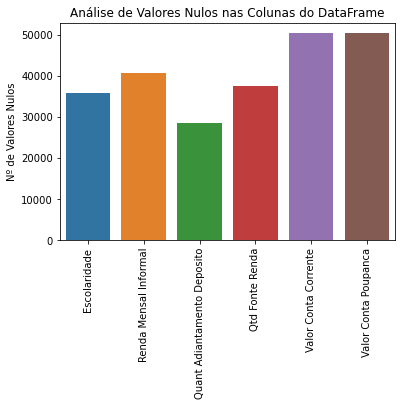

In [9]:
sns.barplot(x=missing_values.index, y=missing_values.Nulos, data=missing_values, order=missing_values.index)
plt.xticks(rotation = 90)
plt.ylabel("Nº de Valores Nulos")
plt.title("Análise de Valores Nulos nas Colunas do DataFrame")

> Acima vemos que as seguintes colunas do dataset posssuem valores faltantes:

- Escolaridade
- Renda Mensal Informal
- Quant Adiantamento Deposito
- Qtd Fonte Renda
- Valor Conta Corrente
- Valor Conta Poupanca

### 1.4 Padronização dos valores booleanos 'S' e 'N'

In [13]:
dict = {
    'S' : 1,
    'N' : 0
}

df_bool = df.replace({'Dependentes' : dict,
            'Conta Poupanca' : dict,
            'Conta Salario' : dict, 
            'Cheque Sem Fundo' : dict,
            'Conta Conjunta' : dict})

In [16]:
dict_renda_informal = {
    True : 1 ,
    False : 0
}

informal_chq_sem_fundo = df_bool
informal_chq_sem_fundo['bool_renda_informal'] = informal_chq_sem_fundo['Renda Mensal Informal'] > 0
informal_chq_sem_fundo.replace({'bool_renda_informal' : dict_renda_informal}, inplace = True)
informal_chq_sem_fundo

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,...,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado,bool_renda_informal
0,NaN,NaN,1,2,36,1,0,NaN,NaN,0,...,263.25,5844.98,14282.55,1,1,1.328587e+06,1,2020-01-01,57,0
1,1.0,1894.5078,0,2,39,1,0,2.0,1.0,1,...,1607.29,7652.26,51035.18,1,1,1.424254e+06,1,2020-01-01,59,1
2,1.0,NaN,1,2,26,1,0,NaN,1.0,1,...,24860.40,319315.62,867116.29,1,1,1.438519e+06,0,2020-01-01,56,0
3,NaN,NaN,0,8,23,0,0,NaN,NaN,0,...,21472.36,2967.48,26032.84,1,1,1.426138e+06,1,2020-01-01,56,0
4,NaN,NaN,1,2,33,1,0,NaN,NaN,0,...,19.44,46.35,2144.76,1,1,1.474504e+06,0,2020-01-01,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50385,NaN,NaN,0,4,26,1,0,2.0,NaN,0,...,36020.75,14170.56,51784.31,0,1,1.686687e+10,0,2020-01-01,57,0
50386,NaN,NaN,0,4,26,1,0,2.0,NaN,0,...,1214.50,154.24,2961.74,0,1,1.695679e+10,0,2020-01-01,57,0
50387,NaN,NaN,1,2,26,1,0,NaN,NaN,1,...,194.32,26.86,1814.18,0,1,1.448218e+06,0,2020-01-01,57,0
50388,1.0,1149.8448,0,2,26,1,0,2.0,2.0,0,...,1038.40,30.53,2661.93,0,1,1.510609e+06,0,2020-01-01,56,1


Text(0.5, 1.0, 'Qtd de Clientes com Renda Informal declarada por situação de Cheque Sem Fundo')

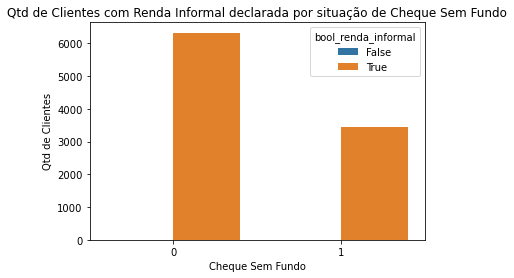

In [17]:
sns.barplot(x ='Cheque Sem Fundo', y = 'bool_renda_informal', hue='', data=informal_chq_sem_fundo)
plt.xlabel('Cheque Sem Fundo')
plt.ylabel('Qtd de Clientes')
plt.title('Qtd de Clientes com Renda Informal declarada por situação de Cheque Sem Fundo')